##### usage of yolo for getting labels only

##### lib and function def

In [5]:
import cv2
import torch
from PIL import Image
import cv2
import torch
from PIL import Image
import glob
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.image as mpimg
import os
from pyzbar.pyzbar import decode
from pyzbar import pyzbar
import cv2
import glob
from tqdm import tqdm
from barcode import EAN13
from barcode.writer import ImageWriter
import matplotlib.pyplot as plt

import cv2
import torch
from PIL import Image


%matplotlib inline

## Objects:
#1. Label
class Label:
    def __init__(self,  boundPoints = None, labelImage = None, originCoordinate = None):
        self.boundPoints = boundPoints
        self.labelImage = labelImage
        self.originCoordinate = originCoordinate
        self.barcodeReadStatus = False
    
        #magnified 
        self.magnifiedImage = None
        self.magnificationFactor = 1
        
        #binarized image
        self.binarizedImage = None

        #decoded barcode
        self.barcodeList = []
        
        #bounding box
        self.boundingBox = None
        

#### files and model loading

In [6]:
files = glob.glob('./Dataset_for_training//*.png')
print(len(files))
another_files = glob.glob('./Dataset_for_training/*.jpg')

for file in another_files:
    files.append(file)
    
    
print(len(files))

0
107


In [7]:
#Model loading - detect locations of labels
model = torch.hub.load('ultralytics/yolov5', 'custom', path='./best.pt')
model.iou = 0.1
print(type(model))

Using cache found in C:\Users\sendr/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2021-12-9 torch 1.8.2+cu111 CUDA:0 (GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients
Adding AutoShape... 


<class 'models.common.AutoShape'>


In [14]:
class ImageFile:
    def __init__(self, image = None):
        self.image = image
        self.results = []
        self.stickers = []

In [9]:
'''
plt.imshow(cv2.imread(files[0])[:,:,::-1])


img2 = cv2.imread(files[0])
#img2.shape
test_image = img2[:,:,::-1]
plt.imshow(img2)
plt.show()
plt.imshow(test_image)
plt.show()

img2 = cv2.imread(files[0])  # OpenCV image (BGR tofiles[0] RGB)'''



imgs = []  # batch of images

for file in files:
    imgs.append(ImageFile(cv2.imread(file)))

for i in range (len(imgs)):
    imgs[i].image = cv2.cvtColor(imgs[i].image, cv2.COLOR_BGR2RGB)
    
for i in range (len(imgs)):
    imgs[i].results = model(np.copy(imgs[i].image))
   
for i in range (len(imgs)):
    imgs[i].results.save()
    df = imgs[i].results.pandas().xyxy[0]
    
    if (len(df) >0):
        for j in range (len(df)):
            xmin = int(df.iloc[j].xmin)
            ymin = int(df.iloc[j].ymin)
            xmax = int(df.iloc[j].xmax)
            ymax = int(df.iloc[j].ymax)
            imgs[i].stickers.append(imgs[i].image[ymin:ymax,xmin:xmax])
    
#Collect all stickers from all images (our sole purpose)
sticker_list = []

for img in imgs:
    for sticker in img.stickers:
        sticker_list.append(sticker)

#check before output  
print(len(sticker_list))
print(type(sticker_list[0]))

Saved 1 image to runs\detect\exp
Saved 1 image to runs\detect\exp2
Saved 1 image to runs\detect\exp3
Saved 1 image to runs\detect\exp4
Saved 1 image to runs\detect\exp5
Saved 1 image to runs\detect\exp6
Saved 1 image to runs\detect\exp7
Saved 1 image to runs\detect\exp8
Saved 1 image to runs\detect\exp9
Saved 1 image to runs\detect\exp10
Saved 1 image to runs\detect\exp11
Saved 1 image to runs\detect\exp12
Saved 1 image to runs\detect\exp13
Saved 1 image to runs\detect\exp14
Saved 1 image to runs\detect\exp15
Saved 1 image to runs\detect\exp16
Saved 1 image to runs\detect\exp17
Saved 1 image to runs\detect\exp18
Saved 1 image to runs\detect\exp19
Saved 1 image to runs\detect\exp20
Saved 1 image to runs\detect\exp21
Saved 1 image to runs\detect\exp22
Saved 1 image to runs\detect\exp23
Saved 1 image to runs\detect\exp24
Saved 1 image to runs\detect\exp25
Saved 1 image to runs\detect\exp26
Saved 1 image to runs\detect\exp27
Saved 1 image to runs\detect\exp28
Saved 1 image to runs\detect\e

418
<class 'numpy.ndarray'>


In [10]:
pwd

'D:\\Experiments'

In [11]:
# convert to RGB
for i in range (len(sticker_list)):
    try:
        #sticker[i] = cv2.cvtColor(sticker[i], cv2.COLOR_BGR2RGB)
        sticker[i] = sticker[i][:,:,::-1]
    except:
        continue
    
#outputting result
i = 0
prefix = ''
for sticker in tqdm(sticker_list):
    
    if (i < 10):
        prefix = '00'
    elif (i < 100):
        prefix = '0'
    elif (i>100):
        prefix = ''
        
    cv2.imwrite('./Stickers/sticker_'+prefix+str(i)+'.jpg',sticker[:,:,::-1])
    i+=1

100%|████████████████████████████████████████████████████████████████████████████████| 418/418 [00:09<00:00, 43.40it/s]


%matplotlib inline
plt.imshow(sticker_list[0][:,:,::-1])
plt.show()

###### another yolos

In [12]:
#Model loading - detect locations of labels
model2 = torch.hub.load('ultralytics/yolov5', 'custom', path='./best_Char.pt')
model.iou = 0.1
print(type(model))

Using cache found in C:\Users\sendr/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2021-12-9 torch 1.8.2+cu111 CUDA:0 (GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model Summary: 224 layers, 7062001 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


<class 'models.common.AutoShape'>


In [25]:
files = glob.glob('./Stickers/*.png')
print(len(files))
another_files = glob.glob('./Stickers/*.jpg')

for file in another_files:
    files.append(file)
    
    
print(len(files))

0
418


In [26]:
imgs = []  # batch of images

for file in files:
    imgs.append(ImageFile(cv2.imread(file)))

for i in range (len(imgs)):
    imgs[i].image = cv2.cvtColor(imgs[i].image, cv2.COLOR_BGR2RGB)
    
for i in range (len(imgs)):
    imgs[i].results = model2(np.copy(imgs[i].image))

In [27]:
for i in range (len(imgs)):
    imgs[i].results.save()
    df = imgs[i].results.pandas().xyxy[0]
    
    if (len(df) >0):
        for j in range (len(df)):
            xmin = int(df.iloc[j].xmin)
            ymin = int(df.iloc[j].ymin)
            xmax = int(df.iloc[j].xmax)
            ymax = int(df.iloc[j].ymax)
            #imgs[i].stickers.append(imgs[i].image[ymin:ymax,xmin:xmax])
            cv2.dra

Saved 1 image to runs\detect\exp526
Saved 1 image to runs\detect\exp527
Saved 1 image to runs\detect\exp528
Saved 1 image to runs\detect\exp529
Saved 1 image to runs\detect\exp530
Saved 1 image to runs\detect\exp531
Saved 1 image to runs\detect\exp532
Saved 1 image to runs\detect\exp533
Saved 1 image to runs\detect\exp534
Saved 1 image to runs\detect\exp535
Saved 1 image to runs\detect\exp536
Saved 1 image to runs\detect\exp537
Saved 1 image to runs\detect\exp538
Saved 1 image to runs\detect\exp539
Saved 1 image to runs\detect\exp540
Saved 1 image to runs\detect\exp541
Saved 1 image to runs\detect\exp542
Saved 1 image to runs\detect\exp543
Saved 1 image to runs\detect\exp544
Saved 1 image to runs\detect\exp545
Saved 1 image to runs\detect\exp546
Saved 1 image to runs\detect\exp547
Saved 1 image to runs\detect\exp548
Saved 1 image to runs\detect\exp549
Saved 1 image to runs\detect\exp550
Saved 1 image to runs\detect\exp551
Saved 1 image to runs\detect\exp552
Saved 1 image to runs\detect

Saved 1 image to runs\detect\exp713
Saved 1 image to runs\detect\exp714
Saved 1 image to runs\detect\exp715
Saved 1 image to runs\detect\exp716
Saved 1 image to runs\detect\exp717
Saved 1 image to runs\detect\exp718
Saved 1 image to runs\detect\exp719
Saved 1 image to runs\detect\exp720
Saved 1 image to runs\detect\exp721
Saved 1 image to runs\detect\exp722
Saved 1 image to runs\detect\exp723
Saved 1 image to runs\detect\exp724
Saved 1 image to runs\detect\exp725
Saved 1 image to runs\detect\exp726
Saved 1 image to runs\detect\exp727
Saved 1 image to runs\detect\exp728
Saved 1 image to runs\detect\exp729
Saved 1 image to runs\detect\exp730
Saved 1 image to runs\detect\exp731
Saved 1 image to runs\detect\exp732
Saved 1 image to runs\detect\exp733
Saved 1 image to runs\detect\exp734
Saved 1 image to runs\detect\exp735
Saved 1 image to runs\detect\exp736
Saved 1 image to runs\detect\exp737
Saved 1 image to runs\detect\exp738
Saved 1 image to runs\detect\exp739
Saved 1 image to runs\detect

Saved 1 image to runs\detect\exp900
Saved 1 image to runs\detect\exp901
Saved 1 image to runs\detect\exp902
Saved 1 image to runs\detect\exp903
Saved 1 image to runs\detect\exp904
Saved 1 image to runs\detect\exp905
Saved 1 image to runs\detect\exp906
Saved 1 image to runs\detect\exp907
Saved 1 image to runs\detect\exp908
Saved 1 image to runs\detect\exp909
Saved 1 image to runs\detect\exp910
Saved 1 image to runs\detect\exp911
Saved 1 image to runs\detect\exp912
Saved 1 image to runs\detect\exp913
Saved 1 image to runs\detect\exp914
Saved 1 image to runs\detect\exp915
Saved 1 image to runs\detect\exp916
Saved 1 image to runs\detect\exp917
Saved 1 image to runs\detect\exp918
Saved 1 image to runs\detect\exp919
Saved 1 image to runs\detect\exp920
Saved 1 image to runs\detect\exp921
Saved 1 image to runs\detect\exp922
Saved 1 image to runs\detect\exp923
Saved 1 image to runs\detect\exp924
Saved 1 image to runs\detect\exp925
Saved 1 image to runs\detect\exp926
Saved 1 image to runs\detect

In [32]:
plt.imshow(imgs[0].stickers[0])
cv2.imwrite('test.jpg', imgs[0].stickers[3])

True

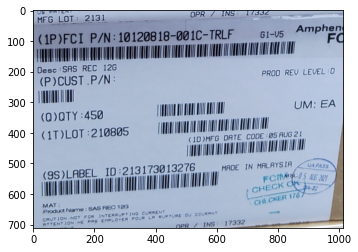

In [35]:
%matplotlib inline
plt.imshow(imgs[0].image)
plt.show()

In [37]:
i = 0
for item in imgs[0].stickers:
    cv2.imwrite('sticker_'+str(i)+'.jpg',item)
    i+=1

In [38]:
import torch

# Model
#model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5n - yolov5x6, custom

# Images
img = imgs[0].image  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model2(img)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

image 1/1: 711x1014 9 attributess, 8 datas
Speed: 20.0ms pre-process, 12.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


In [41]:
results.show()

In [48]:
results.save('./Detection_Results/')

Saved 1 image to Detection_Results


In [44]:
result_list = []

for img in tqdm(imgs):
    result_list.append(model2(img.image))
    
for result in tqdm(result_list):
    result.save('./Detection_Results/')

  0%|                                                                                          | 0/418 [00:00<?, ?it/s]Saved 1 image to Detection_Results
Saved 1 image to Detection_Results
Saved 1 image to Detection_Results
Saved 1 image to Detection_Results
Saved 1 image to Detection_Results
Saved 1 image to Detection_Results
Saved 1 image to Detection_Results
Saved 1 image to Detection_Results
Saved 1 image to Detection_Results
Saved 1 image to Detection_Results
  2%|█▉                                                                               | 10/418 [00:00<00:04, 96.15it/s]Saved 1 image to Detection_Results
Saved 1 image to Detection_Results
Saved 1 image to Detection_Results
Saved 1 image to Detection_Results
Saved 1 image to Detection_Results
Saved 1 image to Detection_Results
Saved 1 image to Detection_Results
Saved 1 image to Detection_Results
Saved 1 image to Detection_Results
Saved 1 image to Detection_Results
Saved 1 image to Detection_Results
Saved 1 image to Detection_

PermissionError: [Errno 13] Permission denied: 'Detection_Results\\image0.jpg'